# Introduction
This notebook contains numeric support for calculation of universality parameters:
1. G Matrix
2. F(i)
3. Gamma(l)

In [1]:
from libs.util import *
from libs.dynamic import *
from libs.factory import *
import numpy as np
import networkx as nx
import pysindy as ps
from scipy.optimize import curve_fit

In [13]:
number_of_nodes = 10
alpha = -0.5

In [7]:
def universality_for_dynamic(dynamic, graph, x0, f=None):
    func = get_dynamic_function(dynamic)

    train_steady_state = find_steady_state(func, x0)
    print(train_steady_state)

    dt = 1
    train_perturbed_full = train_steady_state * alpha
    g_matrix_train, x_train_flow = calculate_g_by_function(train_perturbed_full, train_steady_state, func, dt)
    g_train_dist = find_matrix_dist(g_matrix_train)
    f_train, logf_train = calculate_f(g_matrix_train, graph.degree)
    plot_g(g_train_dist, title=f'{dynamic}', f=f)

## Small World Networks

/home/ali/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


[ 0.51911382 -1.43794509  0.55819872  0.56857519  0.39779313  0.35957841
  0.72136925  0.35509595 -0.86236546 -0.67408463]


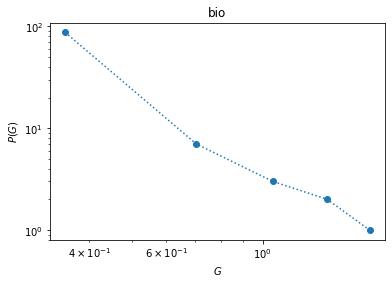

In [20]:
x0 = np.random.rand(number_of_nodes) * 10
graph = get_graph(number_of_nodes, 'small_world', seed=None)
universality_for_dynamic('bio', graph, x0)

[0.75853472 0.81575674 0.74552627 0.70162796 0.69930468 0.79207212
 0.79023749 0.69266278 0.69247189 0.74331579]


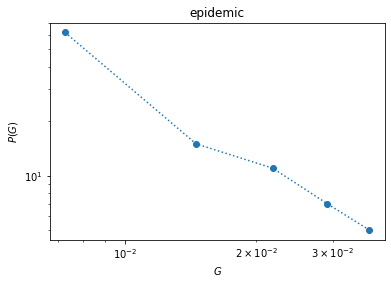

In [26]:
x0 = np.random.rand(number_of_nodes)
graph = get_graph(number_of_nodes, 'small_world', seed=None)
universality_for_dynamic('epidemic', graph, x0)

/home/ali/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[81.83137874 50.75550682  2.11933018 43.35217582 44.6313056  23.88199894
 83.02457318 74.47641766 58.6479001  49.28678526]


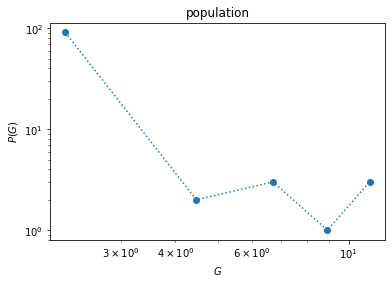

In [48]:
x0 = np.random.rand(number_of_nodes) * 100
graph = get_graph(number_of_nodes, 'small_world', seed=None)
universality_for_dynamic('population', graph, x0)